In [13]:
import numpy as np
import pygrib
import xarray as xr
from sklearn import preprocessing
from sklearn.externals import joblib
scaler  = preprocessing.StandardScaler()
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.signal import detrend
import pandas as pd

In [14]:
t = 156
x = 1291
y = 2801

In [15]:
ds = xr.open_dataset('./alaska_data/EOF/temp_detr.nc')
temp = ds.temp.values
lat = ds.lat.values
lon = ds.lon.values
ds.close()

X1 = np.reshape(temp, (t, x*y), order='F')
X1 = np.ma.masked_array(X1, np.isnan(X1))

ocean = X1.sum(0).mask
land = ~ocean
X1 = X1[:,land]

scaler_temp = scaler.fit(X1)
X1 = scaler_temp.transform(X1)

skpca = PCA()
pca1 = skpca.fit(X1)
X1_pca = skpca.transform(X1)

array([0.74902856, 0.10750979, 0.06932977, 0.01677319, 0.01126263,
       0.00805227, 0.00555654, 0.00431155, 0.00324815, 0.00227975])

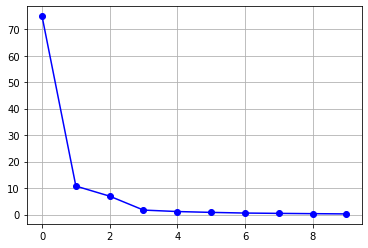

In [5]:
plt.plot(pca1.explained_variance_ratio_[0:10]*100, 'b-o')
plt.grid()
pca1.explained_variance_ratio_[0:10]

In [37]:
PCs = X1_pca[:,1].reshape(-1, 1)
EOFs = pca1.components_[1,:]

scaler_temp = scaler.fit(PCs)
PCs = scaler_temp.transform(PCs)

EOF_recons = np.ones(x*y) * -999.
EOF_recons[land] = EOFs[:]
EOF_recons = np.ma.masked_values(np.reshape(EOF_recons, (x, y), order='F'), -999.)

temp_eof1 = EOF_recons.reshape(x*y)
temp_pc1 = PCs.reshape(t)

# plt.contourf(lon,lat,100*EOF_recons)
# plt.colorbar()

# plt.plot(PCs)
# plt.plot(detrend(PCs))

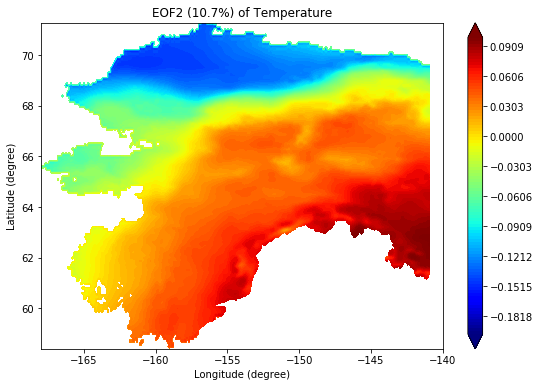

In [41]:
plt.figure(figsize=(9,6))
plt.contourf(lon,lat,100*EOF_recons, cmap=plt.cm.jet,levels=np.linspace(-.2,.1,100), extend='both')
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('EOF2 (10.7%) of Temperature')
plt.savefig('./plot/temp_eof2_detr.png')

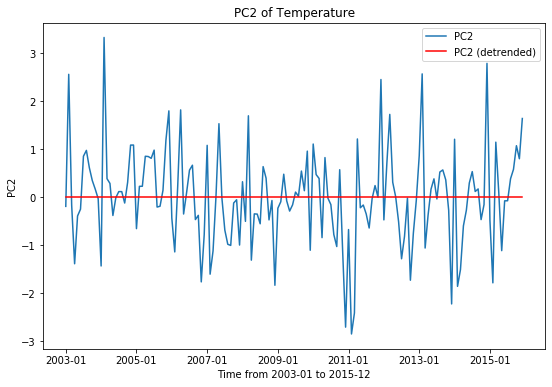

In [43]:
plt.figure(figsize=(9,6))
plt.plot(PCs)
plt.plot(detrend(PCs), 'r')
plt.xlabel('Time from 2003-01 to 2015-12')
plt.ylabel('PC2')
plt.title('PC2 of Temperature')
plt.xticks(np.arange(0, 156, step=24),['%d-01' % (i+2003) for i in range(0,13,2)])
plt.legend(['PC2', 'PC2 (detrended)'])
plt.savefig('./plot/temp_pc2_detr.png')

In [17]:
ds = xr.open_dataset('./alaska_data/EOF/prcp_detr.nc')
prcp = ds.prcp.values
ds.close()

X2 = np.reshape(prcp, (t, x*y), order='F')
X2 = np.ma.masked_array(X2, np.isnan(X2))

ocean = X2.sum(0).mask
land = ~ocean
X2 = X2[:,land]

scaler_temp = scaler.fit(X2)
X2 = scaler_temp.transform(X2)

skpca = PCA()
pca2 = skpca.fit(X2)
X2_pca = skpca.transform(X2)

array([0.40640627, 0.15289254, 0.12341288, 0.04283197, 0.03521216,
       0.03065776, 0.02126518, 0.01666844, 0.01600117, 0.01350703])

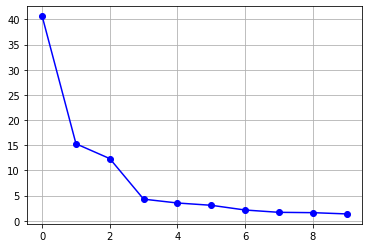

In [12]:
plt.plot(pca2.explained_variance_ratio_[0:10]*100, 'b-o')
plt.grid()
pca2.explained_variance_ratio_[0:10]

In [44]:
PCs = X2_pca[:,1].reshape(-1, 1)
EOFs = pca2.components_[1,:]

scaler_temp = scaler.fit(PCs)
PCs = scaler_temp.transform(PCs)

EOF_recons = np.ones(x*y) * -999.
EOF_recons[land] = EOFs[:]
EOF_recons = np.ma.masked_values(np.reshape(EOF_recons, (x, y), order='F'), -999.)

prcp_eof1 = EOF_recons.reshape(x*y)
prcp_pc1 = PCs.reshape(t)


# plt.contourf(lon,lat,100*EOF_recons)
# plt.colorbar()

# plt.plot(PCs)
# plt.plot(detrend(PCs))

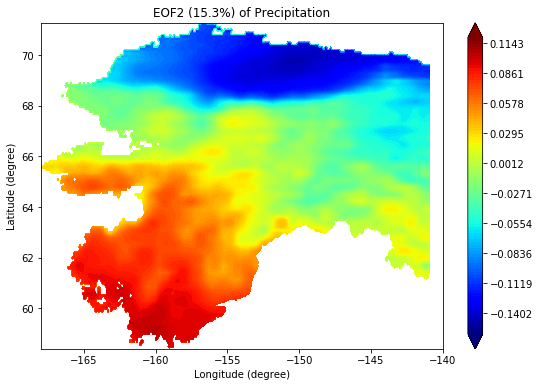

In [46]:
plt.figure(figsize=(9,6))
plt.contourf(lon,lat,100*EOF_recons, cmap=plt.cm.jet,levels=np.linspace(-.16,.12,100), extend='both')
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('EOF2 (15.3%) of Precipitation')
plt.savefig('./plot/prcp_eof2_detr.png')

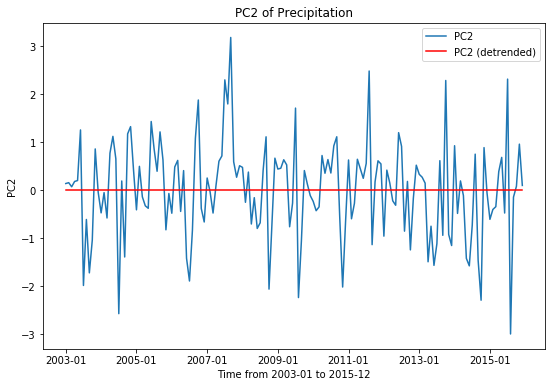

In [47]:
plt.figure(figsize=(9,6))
plt.plot(PCs)
plt.plot(detrend(PCs), 'r')
plt.xlabel('Time from 2003-01 to 2015-12')
plt.ylabel('PC2')
plt.title('PC2 of Precipitation')
plt.xticks(np.arange(0, 156, step=24),['%d-01' % (i+2003) for i in range(0,13,2)])
plt.legend(['PC2', 'PC2 (detrended)'])
plt.savefig('./plot/prcp_pc2_detr.png')

In [19]:
ds = xr.open_dataset('./alaska_data/EOF/vpd_detr.nc')
vpd = ds.vpd.values
ds.close()

X3 = np.reshape(vpd, (t, x*y), order='F')
X3 = np.ma.masked_array(X3, np.isnan(X3))

ocean = X3.sum(0).mask
land = ~ocean
X3 = X3[:,land]

scaler_temp = scaler.fit(X3)
X3 = scaler_temp.transform(X3)

skpca = PCA()
pca3 = skpca.fit(X3)
X3_pca = skpca.transform(X3)

array([0.621525  , 0.0912949 , 0.07030851, 0.04858419, 0.02657879,
       0.0218105 , 0.01675543, 0.01143735, 0.00985034, 0.00756255])

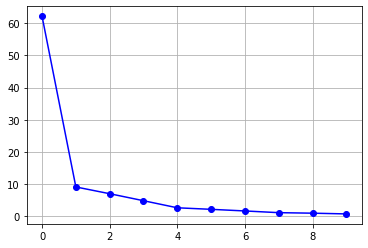

In [18]:
plt.plot(pca3.explained_variance_ratio_[0:10]*100, 'b-o')
plt.grid()
pca3.explained_variance_ratio_[0:10]

In [48]:
PCs = X3_pca[:,1].reshape(-1, 1)
EOFs = pca3.components_[1,:]

scaler_temp = scaler.fit(PCs)
PCs = scaler_temp.transform(PCs)

EOF_recons = np.ones(x*y) * -999.
EOF_recons[land] = EOFs[:]
EOF_recons = np.ma.masked_values(np.reshape(EOF_recons, (x, y), order='F'), -999.)

vpd_eof1 = EOF_recons.reshape(x*y)
vpd_pc1 = PCs.reshape(t)


# plt.contourf(lon,lat,100*EOF_recons)
# plt.colorbar()

# plt.plot(PCs)
# plt.plot(detrend(PCs))

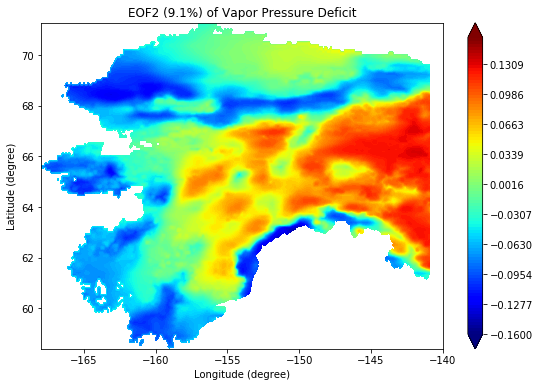

In [50]:
plt.figure(figsize=(9,6))
plt.contourf(lon,lat,100*EOF_recons, cmap=plt.cm.jet,levels=np.linspace(-.16,.16,100), extend='both')
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('EOF2 (9.1%) of Vapor Pressure Deficit')
plt.savefig('./plot/vpd_eof2_detr.png')

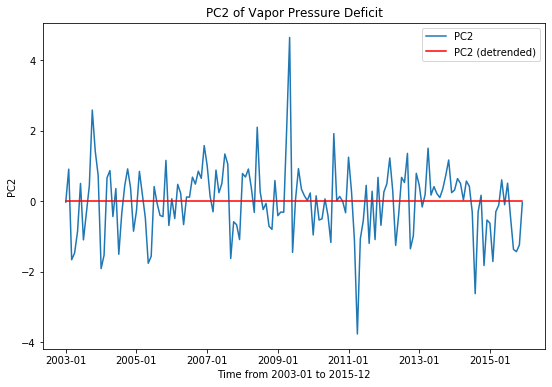

In [51]:
plt.figure(figsize=(9,6))
plt.plot(PCs)
plt.plot(detrend(PCs), 'r')
plt.xlabel('Time from 2003-01 to 2015-12')
plt.ylabel('PC2')
plt.title('PC2 of Vapor Pressure Deficit')
plt.xticks(np.arange(0, 156, step=24),['%d-01' % (i+2003) for i in range(0,13,2)])
plt.legend(['PC2', 'PC2 (detrended)'])
plt.savefig('./plot/vpd_pc2_detr.png')

In [21]:
ds = xr.open_dataset('./alaska_data/EOF/nir_interp.nc')
nir = ds.nir.values
ds.close()

X4 = np.reshape(nir, (t, x*y), order='F')
X4 = np.ma.masked_array(X4, np.isnan(X4))

ocean = X4.sum(0).mask
land = ~ocean
X4 = X4[:,land]

scaler_temp = scaler.fit(X4)
X4 = scaler_temp.transform(X4)

skpca = PCA()
pca4 = skpca.fit(X4)
X4_pca = skpca.transform(X4)

array([0.16230805, 0.04920513, 0.03223271, 0.02888515, 0.02682234,
       0.02599412, 0.02471339, 0.02354905, 0.02268811, 0.02132066])

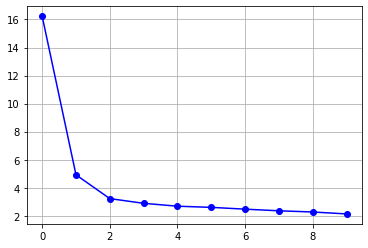

In [5]:
plt.plot(pca4.explained_variance_ratio_[0:10]*100, 'b-o')
plt.grid()
pca4.explained_variance_ratio_[0:10]

In [52]:
PCs = X4_pca[:,1].reshape(-1, 1)
EOFs = pca4.components_[1,:]

scaler_temp = scaler.fit(PCs)
PCs = scaler_temp.transform(PCs)

EOF_recons = np.ones(x*y) * -999.
EOF_recons[land] = EOFs[:]
EOF_recons = np.ma.masked_values(np.reshape(EOF_recons, (x, y), order='F'), -999.)

nir_eof1 = EOF_recons.reshape(x*y)
nir_pc1 = PCs.reshape(t)


# plt.contourf(lon,lat,100*EOF_recons)
# plt.colorbar()

# plt.plot(PCs)
# plt.plot(detrend(PCs))

In [ ]:
plt.figure(figsize=(9,6))
plt.contourf(lon,lat,100*EOF_recons, cmap=plt.cm.jet,levels=np.linspace(-.24,.24,100), extend='both')
plt.colorbar()
plt.xlabel('Longitude (degree)')
plt.ylabel('Latitude (degree)')
plt.title('EOF2 (4.9%) of NIR')
plt.savefig('./plot/nir_eof2.png')

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(PCs, 'b-o')
plt.plot(detrend(PCs), 'r')
plt.xlabel('Time from 2003-01 to 2015-12')
plt.ylabel('PC2')
plt.title('PC2 of NIR (detrend)')
plt.xticks(np.arange(0, 156, step=24),['%d-01' % (i+2003) for i in range(0,13,2)])
plt.legend(['PC2', 'PC2 (detrended)'])
plt.savefig('./plot/nir_pc2_detr.png')

In [25]:
df = pd.DataFrame(np.array([lat.reshape(x*y), lon.reshape(x*y), temp_eof1, prcp_eof1, vpd_eof1, nir_eof1]).T,
             columns=['lat', 'lon', 'temp_eof1','prcp_eof1', 'vpd_eof1', 'nir_eof1'])
df.to_csv('./alaska_data/EOF/eof1.csv',index=False)

In [27]:
mon = np.array([[str(2003+i)+'-'+str(j+1) for j in range(12)] for i in range(13)]).reshape(t)
df = pd.DataFrame(np.array([mon, temp_pc1, prcp_pc1, vpd_pc1, nir_pc1]).T,
             columns=['time', 'temp_pc1','prcp_pc1', 'vpd_pc1', 'nir_pc1'])
df.to_csv('./alaska_data/EOF/pc1.csv',index=False)

In [32]:
df = pd.DataFrame(np.array([lat.reshape(x*y), lon.reshape(x*y), temp_eof1, prcp_eof1, vpd_eof1, nir_eof1]).T,
             columns=['lat', 'lon', 'temp_eof2','prcp_eof2', 'vpd_eof2', 'nir_eof2'])
df.to_csv('./alaska_data/EOF/eof2.csv',index=False)

In [33]:
mon = np.array([[str(2003+i)+'-'+str(j+1) for j in range(12)] for i in range(13)]).reshape(t)
df = pd.DataFrame(np.array([mon, temp_pc1, prcp_pc1, vpd_pc1, nir_pc1]).T,
             columns=['time', 'temp_pc2','prcp_pc2', 'vpd_pc2', 'nir_pc2'])
df.to_csv('./alaska_data/EOF/pc2.csv',index=False)